In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [38]:
df1 = pd.read_csv('super_final.csv')

In [39]:
df1.head()

,Unnamed: 0,alternate_url,Организация:,Описание,Тип занятости,Локация,Ключевые навыки,nameleft,from,to,currency,id_professional_role,requirement,responsibility,id_schedule,id_exp
0,0,https://hh.ru/vacancy/97787105,MPSTATS,MPSTATS — лидирующий сервис аналитики маркетпл...,FULL_TIME,Москва,"['Сопровождение клиентов', 'Знание маркетплейс...",Менеджер по работе с ключевыми клиентами,150000.0,NaN,RUR,40,"Опыт работы на таких позициях, как аккаунт- ме...",Проводить встречи в Zoom для консультации клие...,fullDay,between1And3
1,1,https://hh.ru/vacancy/98305183,Инновационная Экологическая Платформа,Ecoplatform - один из лидеров рынка фандоматов...,FULL_TIME,Москва,['React'],Frontend developer (React),100000.0,150000.0,RUR,96,Опыт разработки мобильных приложений на React ...,Разработка простых интеграций для программы ло...,remote,between1And3
2,2,https://hh.ru/vacancy/97787182,MPSTATS,MPSTATS — лидирующий сервис аналитики маркетпл...,FULL_TIME,Москва,"['Сопровождение клиентов', 'Знание маркетплейс...",Бизнес-консультант,150000.0,NaN,RUR,70,"Опыт работы на таких позициях, как аккаунт- ме...",Проводить встречи в Zoom для консультации клие...,remote,between1And3
3,3,https://hh.ru/vacancy/98594437,НИТУ МИСИС,Университет науки и технологий МИСИС является ...,FULL_TIME,Москва,[],Data Scientist,150000.0,NaN,RUR,96,Высшее образование. Качественный опыт работы в...,Участие в проектировании и реализации решений ...,fullDay,between1And3
4,4,https://hh.ru/vacancy/98273601,ООО «Вин-Маркет»,Кто мы: Aftermarket-DATA © — разработчик прогр...,FULL_TIME,Нижний Новгород,"['PHP', 'Git', 'MySQL', 'Redis', 'REST', 'SOAP...",Python-программист (Backend),90000.0,120000.0,RUR,96,"Python. PHP. HTML, CSS. JavaScript, jQuery. GI...",Участвовать во всех этапах проекта: от проекти...,fullDay,between1And3


# Предобработка данных

In [40]:
df1.isna().sum()

Unnamed: 0                0
alternate_url             0
Организация:              1
Описание                  1
Тип занятости             1
Локация                   1
Ключевые навыки           1
nameleft                  0
from                    263
to                      691
currency                  0
id_professional_role      0
requirement              16
responsibility           56
id_schedule               0
id_exp                    0
dtype: int64

In [41]:
#удалим столбец Unnamed: 0 и alternate_url

df1 = df1.drop(columns=['Unnamed: 0', 'alternate_url'], axis=1)
df1.head()

,Организация:,Описание,Тип занятости,Локация,Ключевые навыки,nameleft,from,to,currency,id_professional_role,requirement,responsibility,id_schedule,id_exp
0,MPSTATS,MPSTATS — лидирующий сервис аналитики маркетпл...,FULL_TIME,Москва,"['Сопровождение клиентов', 'Знание маркетплейс...",Менеджер по работе с ключевыми клиентами,150000.0,NaN,RUR,40,"Опыт работы на таких позициях, как аккаунт- ме...",Проводить встречи в Zoom для консультации клие...,fullDay,between1And3
1,Инновационная Экологическая Платформа,Ecoplatform - один из лидеров рынка фандоматов...,FULL_TIME,Москва,['React'],Frontend developer (React),100000.0,150000.0,RUR,96,Опыт разработки мобильных приложений на React ...,Разработка простых интеграций для программы ло...,remote,between1And3
2,MPSTATS,MPSTATS — лидирующий сервис аналитики маркетпл...,FULL_TIME,Москва,"['Сопровождение клиентов', 'Знание маркетплейс...",Бизнес-консультант,150000.0,NaN,RUR,70,"Опыт работы на таких позициях, как аккаунт- ме...",Проводить встречи в Zoom для консультации клие...,remote,between1And3
3,НИТУ МИСИС,Университет науки и технологий МИСИС является ...,FULL_TIME,Москва,[],Data Scientist,150000.0,NaN,RUR,96,Высшее образование. Качественный опыт работы в...,Участие в проектировании и реализации решений ...,fullDay,between1And3
4,ООО «Вин-Маркет»,Кто мы: Aftermarket-DATA © — разработчик прогр...,FULL_TIME,Нижний Новгород,"['PHP', 'Git', 'MySQL', 'Redis', 'REST', 'SOAP...",Python-программист (Backend),90000.0,120000.0,RUR,96,"Python. PHP. HTML, CSS. JavaScript, jQuery. GI...",Участвовать во всех этапах проекта: от проекти...,fullDay,between1And3


In [42]:
#Как мы видим все пропуски по признакам Описание, Организация, Типа занятости, Ключевые навыки и локация в одной строке
df1[df1[['Организация:', 'Тип занятости']].isna().any(axis=1)] 

,Организация:,Описание,Тип занятости,Локация,Ключевые навыки,nameleft,from,to,currency,id_professional_role,requirement,responsibility,id_schedule,id_exp
1352,NaN,NaN,NaN,NaN,NaN,Разработчик React/TypeScript/Tailwind CSS,100000.0,NaN,RUR,96,"Опыт работы с React, TypeScript и Tailwind CSS...",Реализация адаптивного дизайна для различных у...,fullDay,between3And6


In [43]:
#Удалим пропуски не связанные с ЗП

l = ['Организация:', 'requirement', 'responsibility']

df1 = df1[~df1[l].isna().any(axis=1)] #удалим эти пропуски
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1642 entries, 0 to 1711
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Организация:          1642 non-null   object 
 1   Описание              1642 non-null   object 
 2   Тип занятости         1642 non-null   object 
 3   Локация               1642 non-null   object 
 4   Ключевые навыки       1642 non-null   object 
 5   nameleft              1642 non-null   object 
 6   from                  1389 non-null   float64
 7   to                    973 non-null    float64
 8   currency              1642 non-null   object 
 9   id_professional_role  1642 non-null   int64  
 10  requirement           1642 non-null   object 
 11  responsibility        1642 non-null   object 
 12  id_schedule           1642 non-null   object 
 13  id_exp                1642 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 192.4+ KB


In [44]:
# Теперь  поменяем названия признаков на более удобные

df1.rename(columns={'Организация:':'Организация', 'nameleft':'Вакансия', 'from':'ЗП_от', 'to':'ЗП_до', 'currency':'Валюта', 
                   'id_professional_role':'Профессия_id', 'requirement':'Требования', 'responsibility':'Обязанности',
                   'id_schedule':'Расписание', 'id_exp':'Опыт', 'Тип занятости':'Тип_занятости'}, inplace=True)

In [45]:
# Ну и проверив дубликаты 

df1.duplicated().sum()

1

In [46]:
df1.drop_duplicates(inplace=True)

In [47]:
decoder = pd.read_csv('role_decoder.csv') #Выгрузим названия профессий, которые соответсвуют конкретным айди
decoder.drop('Unnamed: 0', axis=1, inplace=True)
decoder

,id_professional_role,professional_role
0,40,Другое
1,96,"Программист, разработчик"
2,70,"Менеджер по продажам, менеджер по работе с кли..."
3,10,Аналитик
4,73,Менеджер продукта
...,...,...
60,1,Event-менеджер
61,111,"Сервисный инженер, инженер-механик"
62,116,Специалист по информационной безопасности
63,125,Технический директор (CTO)


In [48]:
#Доюавим в наш датафрейм новый признак

decoder.rename(columns={'id_professional_role':'Профессия_id'}, inplace=True) 
df1.reset_index(drop=True, inplace=True)
df1 = df1.merge(decoder, how='left', on='Профессия_id')
df1.rename(columns={'professional_role':'Профессия'}, inplace=True)
df1.head()

,Организация,Описание,Тип_занятости,Локация,Ключевые навыки,Вакансия,ЗП_от,ЗП_до,Валюта,Профессия_id,Требования,Обязанности,Расписание,Опыт,Профессия
0,MPSTATS,MPSTATS — лидирующий сервис аналитики маркетпл...,FULL_TIME,Москва,"['Сопровождение клиентов', 'Знание маркетплейс...",Менеджер по работе с ключевыми клиентами,150000.0,NaN,RUR,40,"Опыт работы на таких позициях, как аккаунт- ме...",Проводить встречи в Zoom для консультации клие...,fullDay,between1And3,Другое
1,Инновационная Экологическая Платформа,Ecoplatform - один из лидеров рынка фандоматов...,FULL_TIME,Москва,['React'],Frontend developer (React),100000.0,150000.0,RUR,96,Опыт разработки мобильных приложений на React ...,Разработка простых интеграций для программы ло...,remote,between1And3,"Программист, разработчик"
2,MPSTATS,MPSTATS — лидирующий сервис аналитики маркетпл...,FULL_TIME,Москва,"['Сопровождение клиентов', 'Знание маркетплейс...",Бизнес-консультант,150000.0,NaN,RUR,70,"Опыт работы на таких позициях, как аккаунт- ме...",Проводить встречи в Zoom для консультации клие...,remote,between1And3,"Менеджер по продажам, менеджер по работе с кли..."
3,НИТУ МИСИС,Университет науки и технологий МИСИС является ...,FULL_TIME,Москва,[],Data Scientist,150000.0,NaN,RUR,96,Высшее образование. Качественный опыт работы в...,Участие в проектировании и реализации решений ...,fullDay,between1And3,"Программист, разработчик"
4,ООО «Вин-Маркет»,Кто мы: Aftermarket-DATA © — разработчик прогр...,FULL_TIME,Нижний Новгород,"['PHP', 'Git', 'MySQL', 'Redis', 'REST', 'SOAP...",Python-программист (Backend),90000.0,120000.0,RUR,96,"Python. PHP. HTML, CSS. JavaScript, jQuery. GI...",Участвовать во всех этапах проекта: от проекти...,fullDay,between1And3,"Программист, разработчик"


Теперь удалим лишние профессии, которые попали в наши данные

In [49]:
l = ['Разнорабочий', 'Сервисный инженер, инженер=механик', 'Event-менеджер', 'Методист', 
     'Менеджер по персоналу', 'Научный специалист, исследователь', 'Переводчик', 'Менеджер по логистике, менеджер по ВЭД', 
     'Массажист', 'Оператор станков с ЧПУ', 'Электромонтажник', 'Продюсер', 'Учитель, преподаватель, педагог',
     'Менеджер по продажам, менеджер по работе с клиентами','Руководитель отдела продаж', 'Менеджер по работе с партнерами', 
     'Копирайтер, редактор, корректор', 'Администратор', 'Специалист по подбору персонала','Менеджер по закупкам', 'Дизайнер, художник',
     'Экономист', 'Менеджер по компенсациям и льготам', 'Оператор call-центра, специалист контактного центра', 
     'SMM-менеджер, контент-менеджер', 'Руководитель отдела маркетинга и рекламы', 'Инженер-конструктор, инженер-проектировщик',
     'Инженер по эксплуатации', 'Архитектор', 'Инженер-электроник, инженер-электронщик', 'Продавец-консультант, продавец-кассир',
     'Токарь, фрезеровщик, шлифовщик', 'Офис-менеджер', 'Делопроизводитель, архивариус', 'Другое', 'Главный инженер проекта', 
     'Специалист технической поддержки', 'Бухгалтер', 'Сервисный инженер, инженер-механик', 'Специалист по информационной безопасности',
     'Финансовый менеджер', 'Технический директор (CTO)', 'Секретарь, помощник руководителя, ассистент', 
     'Менеджер по маркетингу, интернет-маркетолог', 'PR-менеджер']

In [50]:
df = df1[df1['Профессия'].isin(l) == False]

# Поработаем с категориальными и числовыми признакми

In [51]:
df.head()

,Организация,Описание,Тип_занятости,Локация,Ключевые навыки,Вакансия,ЗП_от,ЗП_до,Валюта,Профессия_id,Требования,Обязанности,Расписание,Опыт,Профессия
1,Инновационная Экологическая Платформа,Ecoplatform - один из лидеров рынка фандоматов...,FULL_TIME,Москва,['React'],Frontend developer (React),100000.0,150000.0,RUR,96,Опыт разработки мобильных приложений на React ...,Разработка простых интеграций для программы ло...,remote,between1And3,"Программист, разработчик"
3,НИТУ МИСИС,Университет науки и технологий МИСИС является ...,FULL_TIME,Москва,[],Data Scientist,150000.0,NaN,RUR,96,Высшее образование. Качественный опыт работы в...,Участие в проектировании и реализации решений ...,fullDay,between1And3,"Программист, разработчик"
4,ООО «Вин-Маркет»,Кто мы: Aftermarket-DATA © — разработчик прогр...,FULL_TIME,Нижний Новгород,"['PHP', 'Git', 'MySQL', 'Redis', 'REST', 'SOAP...",Python-программист (Backend),90000.0,120000.0,RUR,96,"Python. PHP. HTML, CSS. JavaScript, jQuery. GI...",Участвовать во всех этапах проекта: от проекти...,fullDay,between1And3,"Программист, разработчик"
5,Data-Power,Требуемый опыт работы: 3–6 лет Полная занятост...,FULL_TIME,Санкт-Петербург,"['DAX', 'PostgreSQL', 'SQL', 'Power BI', 'Powe...",Разработчик Power BI,100000.0,160000.0,RUR,96,...в <highlighttext>аналитике</highlighttext>:...,Разработка и внедрение <highlighttext>аналитик...,fullDay,between1And3,"Программист, разработчик"
6,RTNO,"Привет! Мы компания RTNO, занимаемся аналитико...",FULL_TIME,Москва,"['Python', 'Сбор и анализ информации', 'Анализ...",Аналитик крипто проектов,75000.0,NaN,RUR,10,Поддержание актуальных знаний о развитии рынка...,Ежедневный анализ децентрализованных и централ...,fullDay,noExperience,Аналитик


In [52]:
#Проверим сколько у нас организаций 
df['Организация'].value_counts()

Организация
Психограм                          12
Aston                              12
Data World                         10
Softline                            9
Тагес Джамп                         9
                                   ..
SEOTLT                              1
.wrk                                1
НМТ                                 1
Dinord                              1
Русские Механические Технологии     1
Name: count, Length: 885, dtype: int64

In [53]:
#Теперб посмотрим на тип занятости 

df['Тип_занятости'].value_counts()

Тип_занятости
FULL_TIME    1181
INTERN         40
TEMPORARY      23
PART_TIME      20
Name: count, dtype: int64

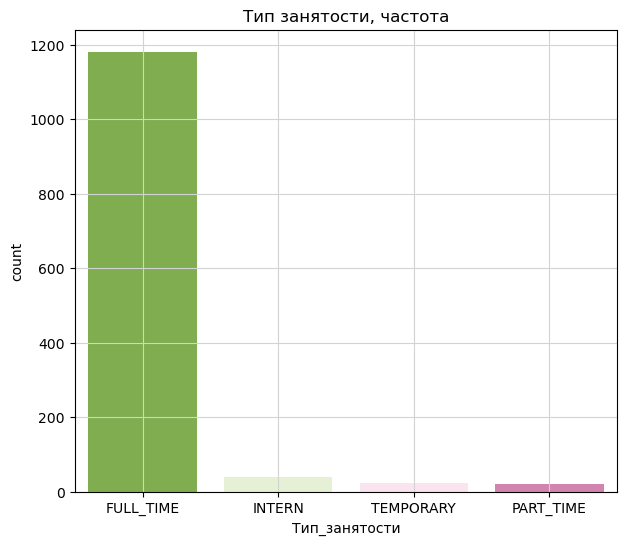

In [54]:
#Как мы видим подавляющее число вакансий в нашей сфере - фул тайм
plt.figure(figsize = (7,6))
u = df['Тип_занятости'].value_counts().reset_index()
ax = sns.barplot(x=u['Тип_занятости'], y=u['count'], palette='PiYG_r')
ax.set_title('Тип занятости, частота')
ax.grid(color='lightgray', which='both');

In [55]:
df['Локация'].value_counts()

Локация
Москва                              624
Санкт-Петербург                     167
Новосибирск                          40
Екатеринбург                         32
Казань                               31
                                   ... 
городской округ Чебоксары             1
Ирвайн                                1
Волжский (Волгоградская область)      1
Благовещенск (Амурская область)       1
Зеленоград                            1
Name: count, Length: 95, dtype: int64

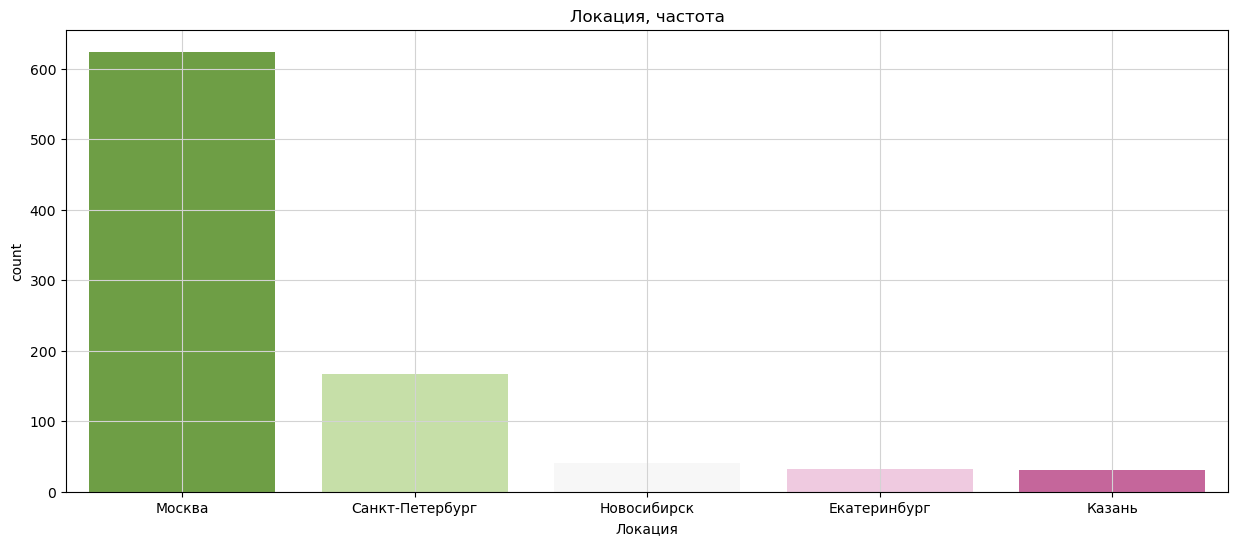

In [56]:
#посмотрим распрделение по Топ-5 городам: основаная концентрация вакансий - Москва и Питер
plt.figure(figsize = (15,6))
u = df['Локация'].value_counts()[:5].reset_index()
ax = sns.barplot(x=u['Локация'], y=u['count'], palette='PiYG_r')
ax.set_title('Локация, частота')
ax.grid(color='lightgray', which='both');

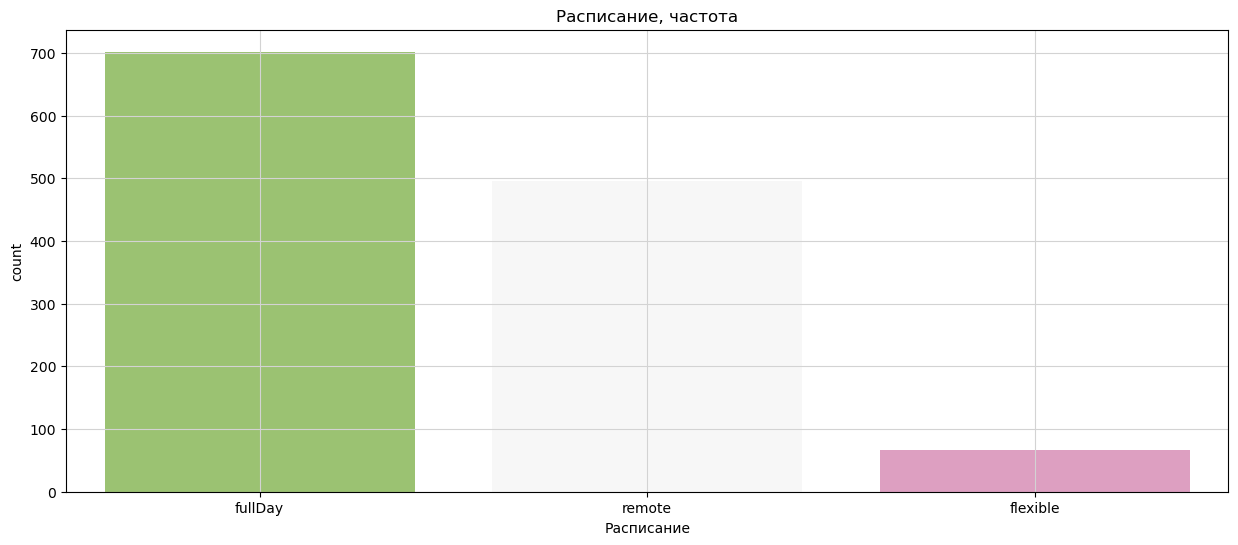

In [57]:
# Теперб посмотрим на расписание
# Как можно заметить, удаленка встречается почти так же часто, как фул дей в офисе очно

plt.figure(figsize = (15,6))
u = df['Расписание'].value_counts().reset_index()
ax = sns.barplot(x=u['Расписание'], y=u['count'], palette='PiYG_r')
ax.set_title('Расписание, частота')
ax.grid(color='lightgray', which='both');

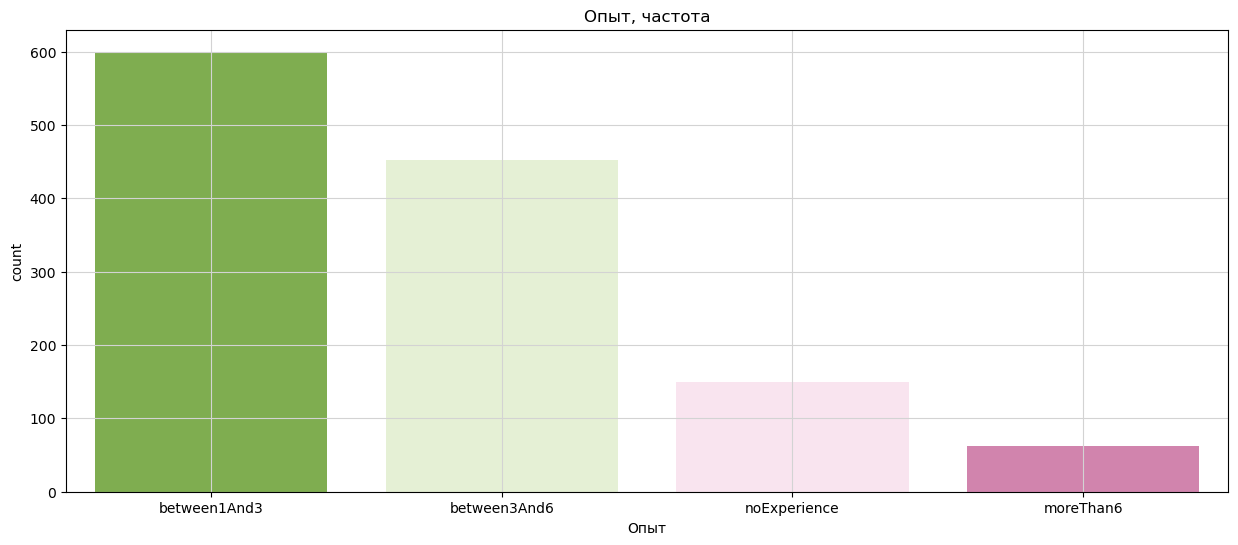

In [58]:
# И финально проверим, что у нас с опытом
# Интресно, людей без опыта ищут чаще, чем с опытом больше 6 лет))
plt.figure(figsize = (15,6))
u = df['Опыт'].value_counts().reset_index()
ax = sns.barplot(x=u['Опыт'], y=u['count'], palette='PiYG_r')
ax.set_title('Опыт, частота')
ax.grid(color='lightgray', which='both');

In [59]:
df.head()

,Организация,Описание,Тип_занятости,Локация,Ключевые навыки,Вакансия,ЗП_от,ЗП_до,Валюта,Профессия_id,Требования,Обязанности,Расписание,Опыт,Профессия
1,Инновационная Экологическая Платформа,Ecoplatform - один из лидеров рынка фандоматов...,FULL_TIME,Москва,['React'],Frontend developer (React),100000.0,150000.0,RUR,96,Опыт разработки мобильных приложений на React ...,Разработка простых интеграций для программы ло...,remote,between1And3,"Программист, разработчик"
3,НИТУ МИСИС,Университет науки и технологий МИСИС является ...,FULL_TIME,Москва,[],Data Scientist,150000.0,NaN,RUR,96,Высшее образование. Качественный опыт работы в...,Участие в проектировании и реализации решений ...,fullDay,between1And3,"Программист, разработчик"
4,ООО «Вин-Маркет»,Кто мы: Aftermarket-DATA © — разработчик прогр...,FULL_TIME,Нижний Новгород,"['PHP', 'Git', 'MySQL', 'Redis', 'REST', 'SOAP...",Python-программист (Backend),90000.0,120000.0,RUR,96,"Python. PHP. HTML, CSS. JavaScript, jQuery. GI...",Участвовать во всех этапах проекта: от проекти...,fullDay,between1And3,"Программист, разработчик"
5,Data-Power,Требуемый опыт работы: 3–6 лет Полная занятост...,FULL_TIME,Санкт-Петербург,"['DAX', 'PostgreSQL', 'SQL', 'Power BI', 'Powe...",Разработчик Power BI,100000.0,160000.0,RUR,96,...в <highlighttext>аналитике</highlighttext>:...,Разработка и внедрение <highlighttext>аналитик...,fullDay,between1And3,"Программист, разработчик"
6,RTNO,"Привет! Мы компания RTNO, занимаемся аналитико...",FULL_TIME,Москва,"['Python', 'Сбор и анализ информации', 'Анализ...",Аналитик крипто проектов,75000.0,NaN,RUR,10,Поддержание актуальных знаний о развитии рынка...,Ежедневный анализ децентрализованных и централ...,fullDay,noExperience,Аналитик


In [60]:
#Теперь придумаем что-то с ЗП, а точнее добавим признак ЗП_средняя

def paypay(raw):
    if str(raw['ЗП_от']).isalpha():
        avg = raw['ЗП_до']
    elif str(raw['ЗП_до']).isalpha():
        avg = raw['ЗП_от']
    else:
        avg = (raw['ЗП_до'] + raw['ЗП_от']) / 2
    return avg

df.apply(paypay, axis=1)

1       125000.0
3       150000.0
4       105000.0
5       130000.0
6        75000.0
          ...   
1636    300000.0
1637    140000.0
1638    215000.0
1639    180000.0
1640    115000.0
Length: 1264, dtype: float64

In [61]:
df['ЗП_сред'] = df.apply(paypay, axis=1)

In [62]:
df.head()

,Организация,Описание,Тип_занятости,Локация,Ключевые навыки,Вакансия,ЗП_от,ЗП_до,Валюта,Профессия_id,Требования,Обязанности,Расписание,Опыт,Профессия,ЗП_сред
1,Инновационная Экологическая Платформа,Ecoplatform - один из лидеров рынка фандоматов...,FULL_TIME,Москва,['React'],Frontend developer (React),100000.0,150000.0,RUR,96,Опыт разработки мобильных приложений на React ...,Разработка простых интеграций для программы ло...,remote,between1And3,"Программист, разработчик",125000.0
3,НИТУ МИСИС,Университет науки и технологий МИСИС является ...,FULL_TIME,Москва,[],Data Scientist,150000.0,NaN,RUR,96,Высшее образование. Качественный опыт работы в...,Участие в проектировании и реализации решений ...,fullDay,between1And3,"Программист, разработчик",150000.0
4,ООО «Вин-Маркет»,Кто мы: Aftermarket-DATA © — разработчик прогр...,FULL_TIME,Нижний Новгород,"['PHP', 'Git', 'MySQL', 'Redis', 'REST', 'SOAP...",Python-программист (Backend),90000.0,120000.0,RUR,96,"Python. PHP. HTML, CSS. JavaScript, jQuery. GI...",Участвовать во всех этапах проекта: от проекти...,fullDay,between1And3,"Программист, разработчик",105000.0
5,Data-Power,Требуемый опыт работы: 3–6 лет Полная занятост...,FULL_TIME,Санкт-Петербург,"['DAX', 'PostgreSQL', 'SQL', 'Power BI', 'Powe...",Разработчик Power BI,100000.0,160000.0,RUR,96,...в <highlighttext>аналитике</highlighttext>:...,Разработка и внедрение <highlighttext>аналитик...,fullDay,between1And3,"Программист, разработчик",130000.0
6,RTNO,"Привет! Мы компания RTNO, занимаемся аналитико...",FULL_TIME,Москва,"['Python', 'Сбор и анализ информации', 'Анализ...",Аналитик крипто проектов,75000.0,NaN,RUR,10,Поддержание актуальных знаний о развитии рынка...,Ежедневный анализ децентрализованных и централ...,fullDay,noExperience,Аналитик,75000.0


In [63]:
df['Валюта'].value_counts()

Валюта
RUR    1186
USD      67
EUR      11
Name: count, dtype: int64

In [64]:
#Переведем все в рубли

r_d = 91.82
r_e = 98.95

def curr(raw):
    if raw['Валюта'] == 'RUR':
        final = raw['ЗП_сред']
    elif raw['Валюта'] == 'USD':
        final = raw['ЗП_сред'] * r_d
    else:
        final = raw['ЗП_сред'] * r_e
    return final

df['ЗП_сред_RUB'] = df.apply(curr, axis=1)

In [65]:
#Теперь создадим новый признак Локация_топы, где оставим только 5 городов, где больше всего вакансий, а остальные запишем как другое

top_5 = ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Казань', 'Екатеринбург']
def city(raw):
    if raw['Локация'] in top_5:
        gorod = raw['Локация']
    else:
        gorod = 'Другое'
    return gorod

df['Локация_2'] = df.apply(city, axis=1)

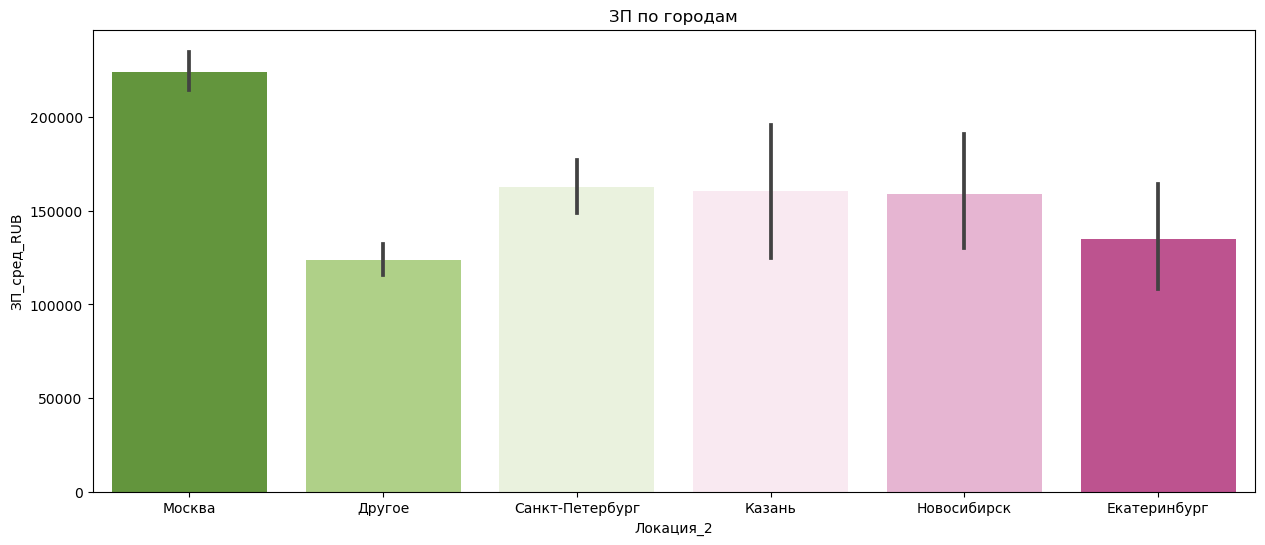

In [66]:
# А теперь посмотрим на средний уровень ЗП по городам
# Как мы можем заметить в Москва ЗП сильно выше, чем в остальных гордах, ниже всего ЗП в городах не относящихся к топ-5

plt.figure(figsize = (15,6))
sns.barplot(x="Локация_2", y="ЗП_сред_RUB", data=df, palette="PiYG_r")
plt.title("ЗП по городам")
plt.show()

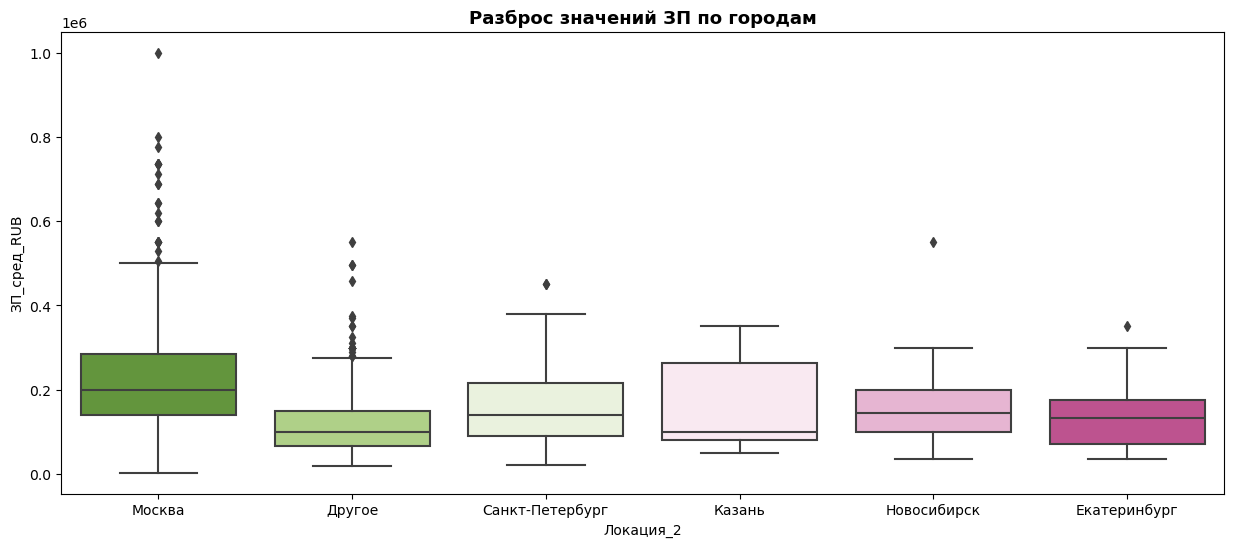

In [67]:
#Отметим довольно сильные выбросы в Москве. 
#Самая верзняя граница ЗП в Москве. Причем походу есть 1-2 предложения с очень высокой ставкой
#Но на графике также видно, что самая нижняя граница ЗП тоже в Москве ;)

plt.figure(figsize = (15,6))
plt.title('Разброс значений ЗП по городам', fontsize='13', weight='bold')
sns.boxplot(df, x='Локация_2', y='ЗП_сред_RUB', palette='PiYG_r');

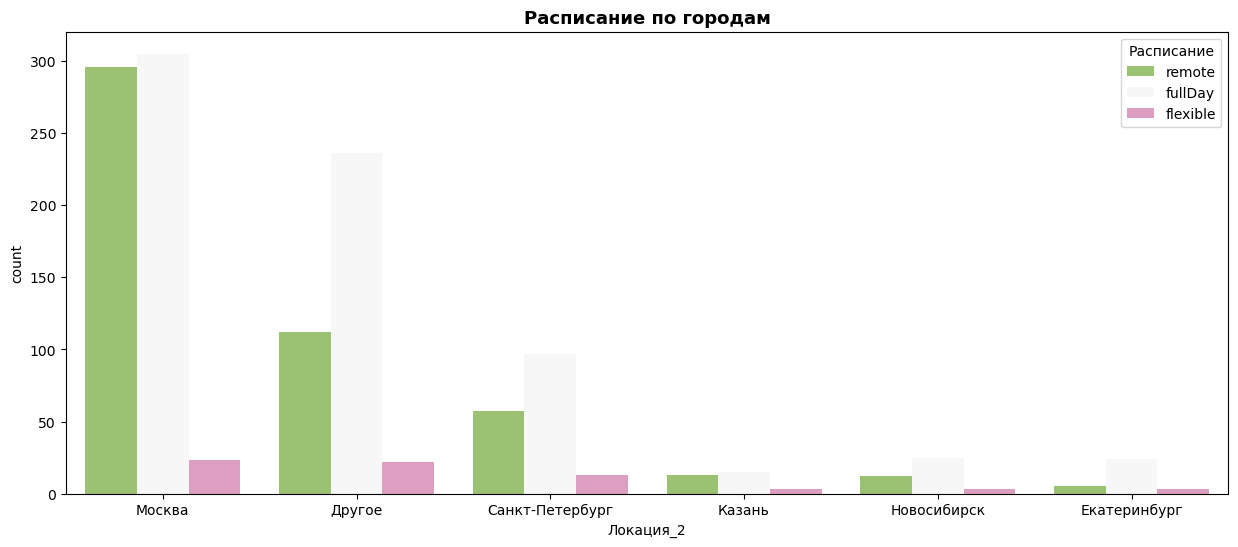

In [68]:
#Проверим, есть ли зависимость между городом и расписанием
# Как мы можем заметить сильной зависимости нет, поскольку соотношение удаленки и офиса сохраняется почти везде, кроме Казани.

plt.figure(figsize = (15,6))
plt.title('Расписание по городам', fontsize='13', weight='bold')
sns.countplot(x = 'Локация_2', hue = 'Расписание', data = df, palette='PiYG_r');

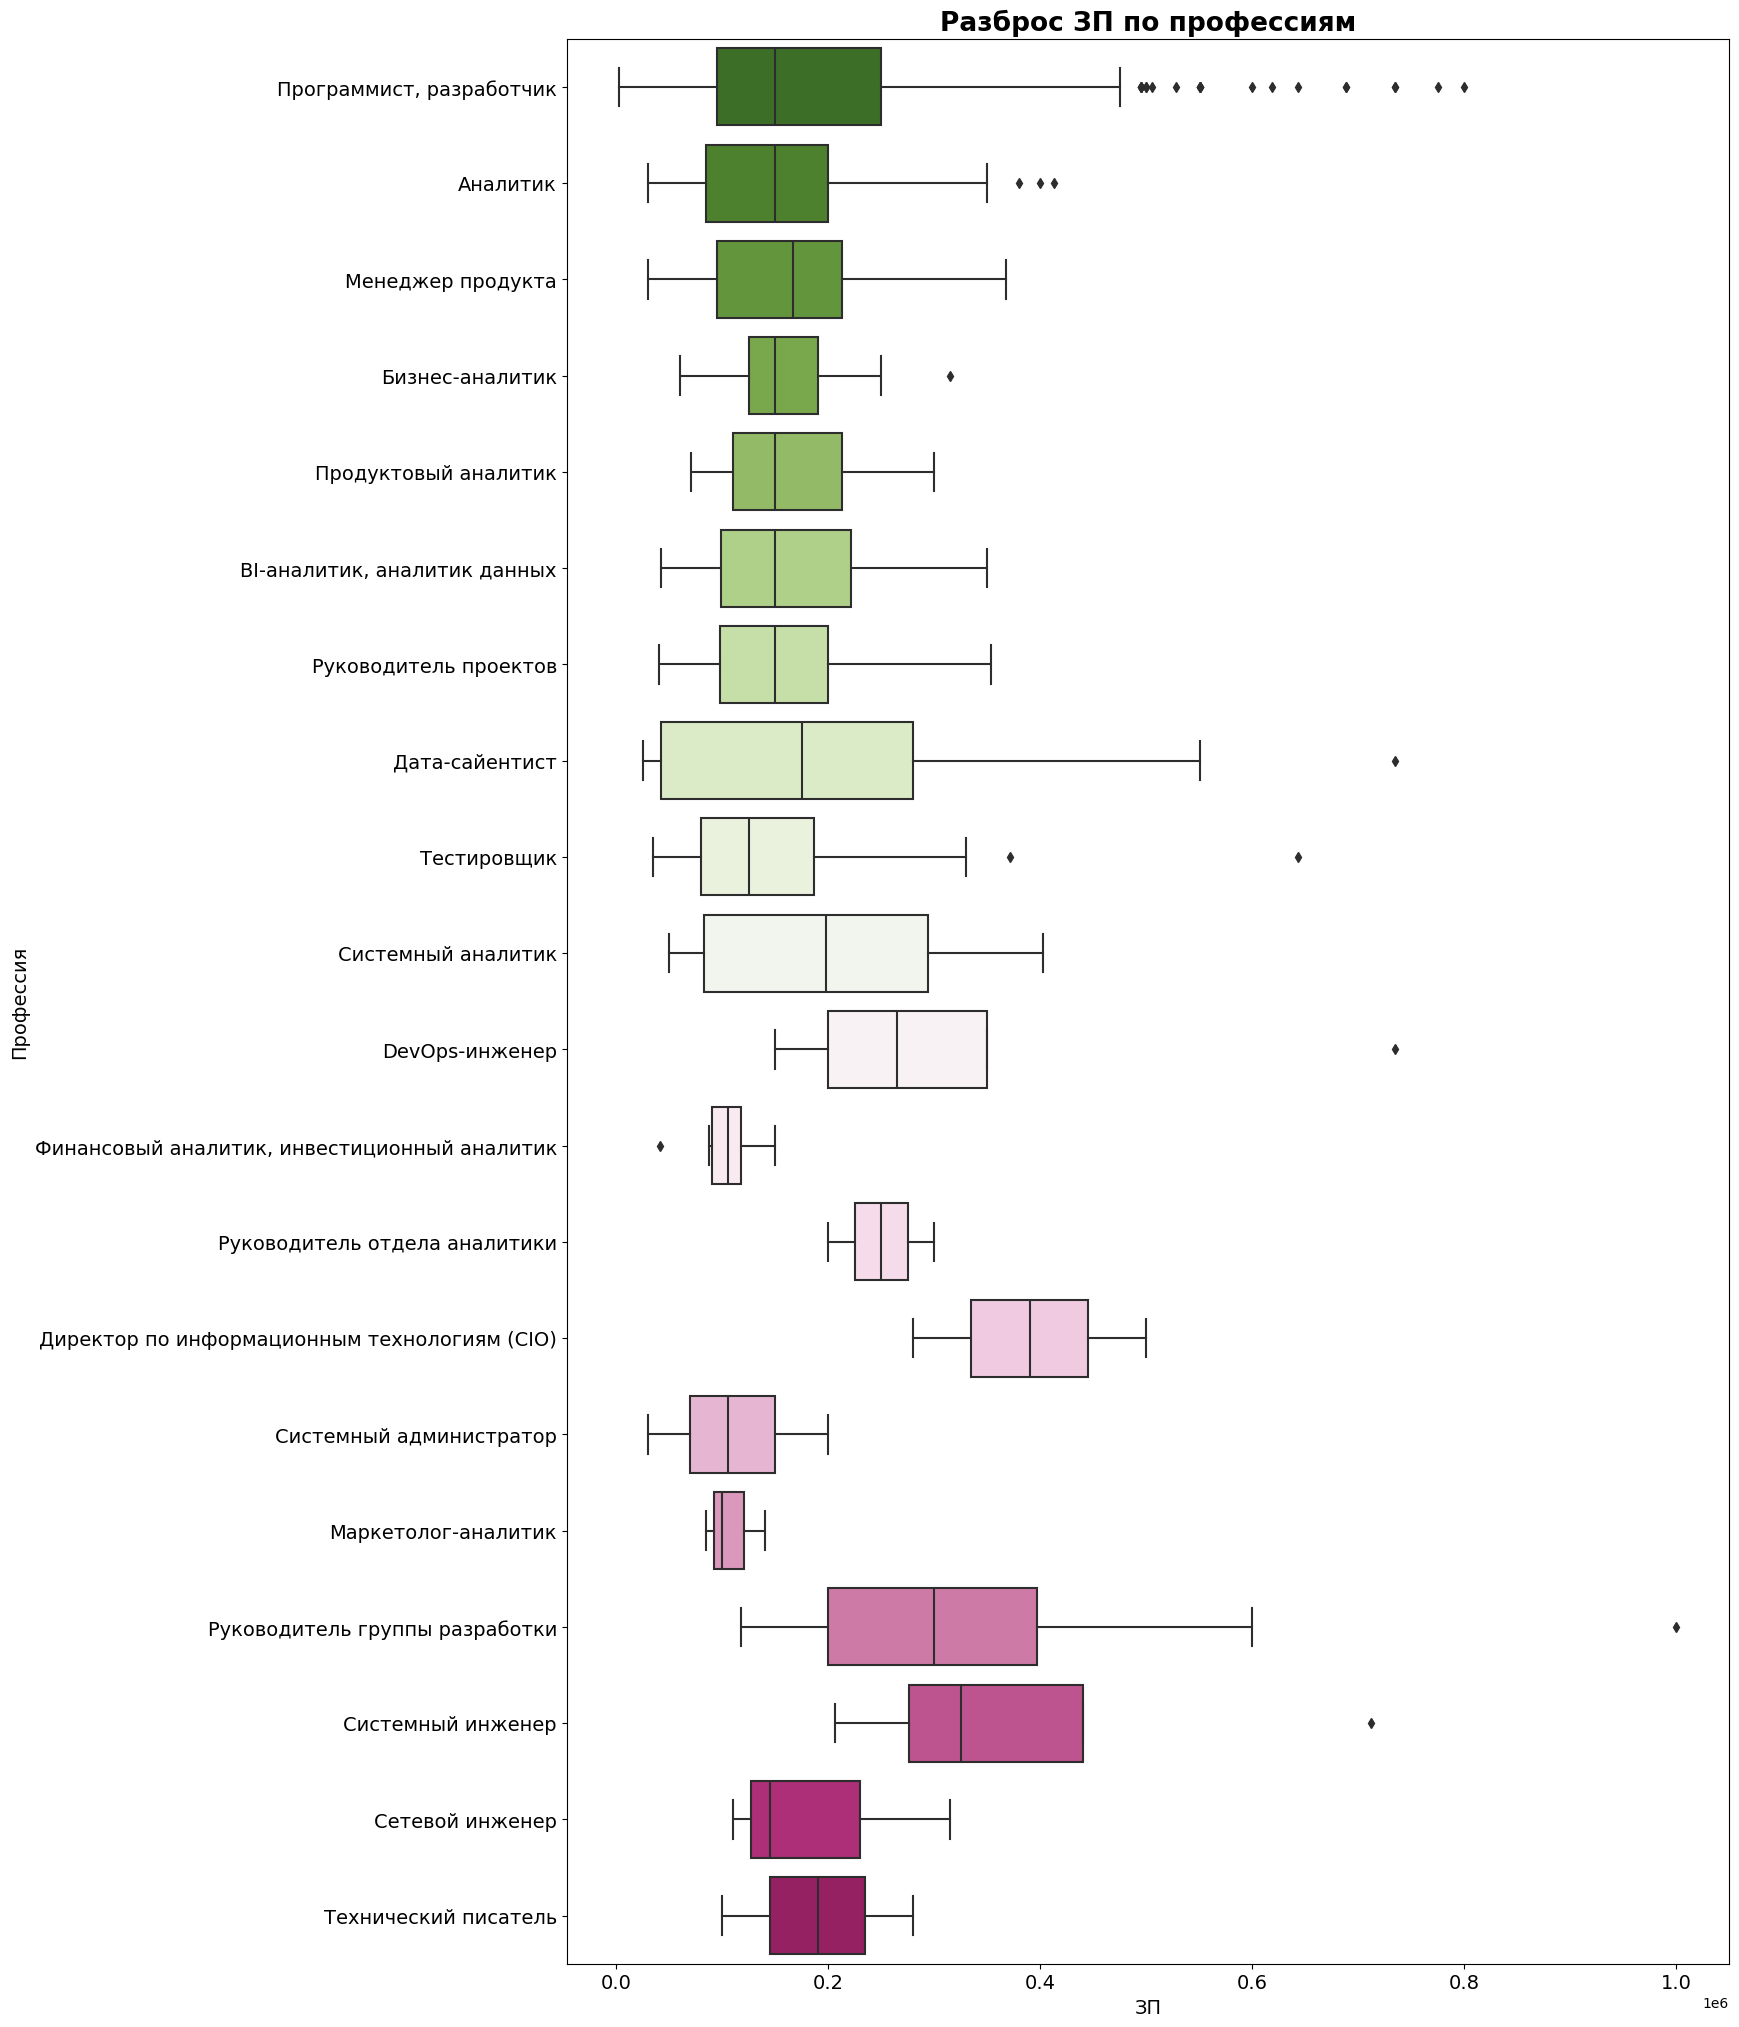

In [70]:
#А теперь посмотрим на оооочень большой график. Распрделение ЗП по специализации

plt.figure(figsize = (15,25))
plt.title('Разброс ЗП по профессиям', fontsize='19', weight='bold')
sns.boxplot(df, x='ЗП_сред_RUB', y='Профессия', palette='PiYG_r', orient='h')
plt.yticks(size='14')
plt.xticks(size='14')
plt.ylabel('Профессия', size='14')
plt.xlabel('ЗП', size='14');

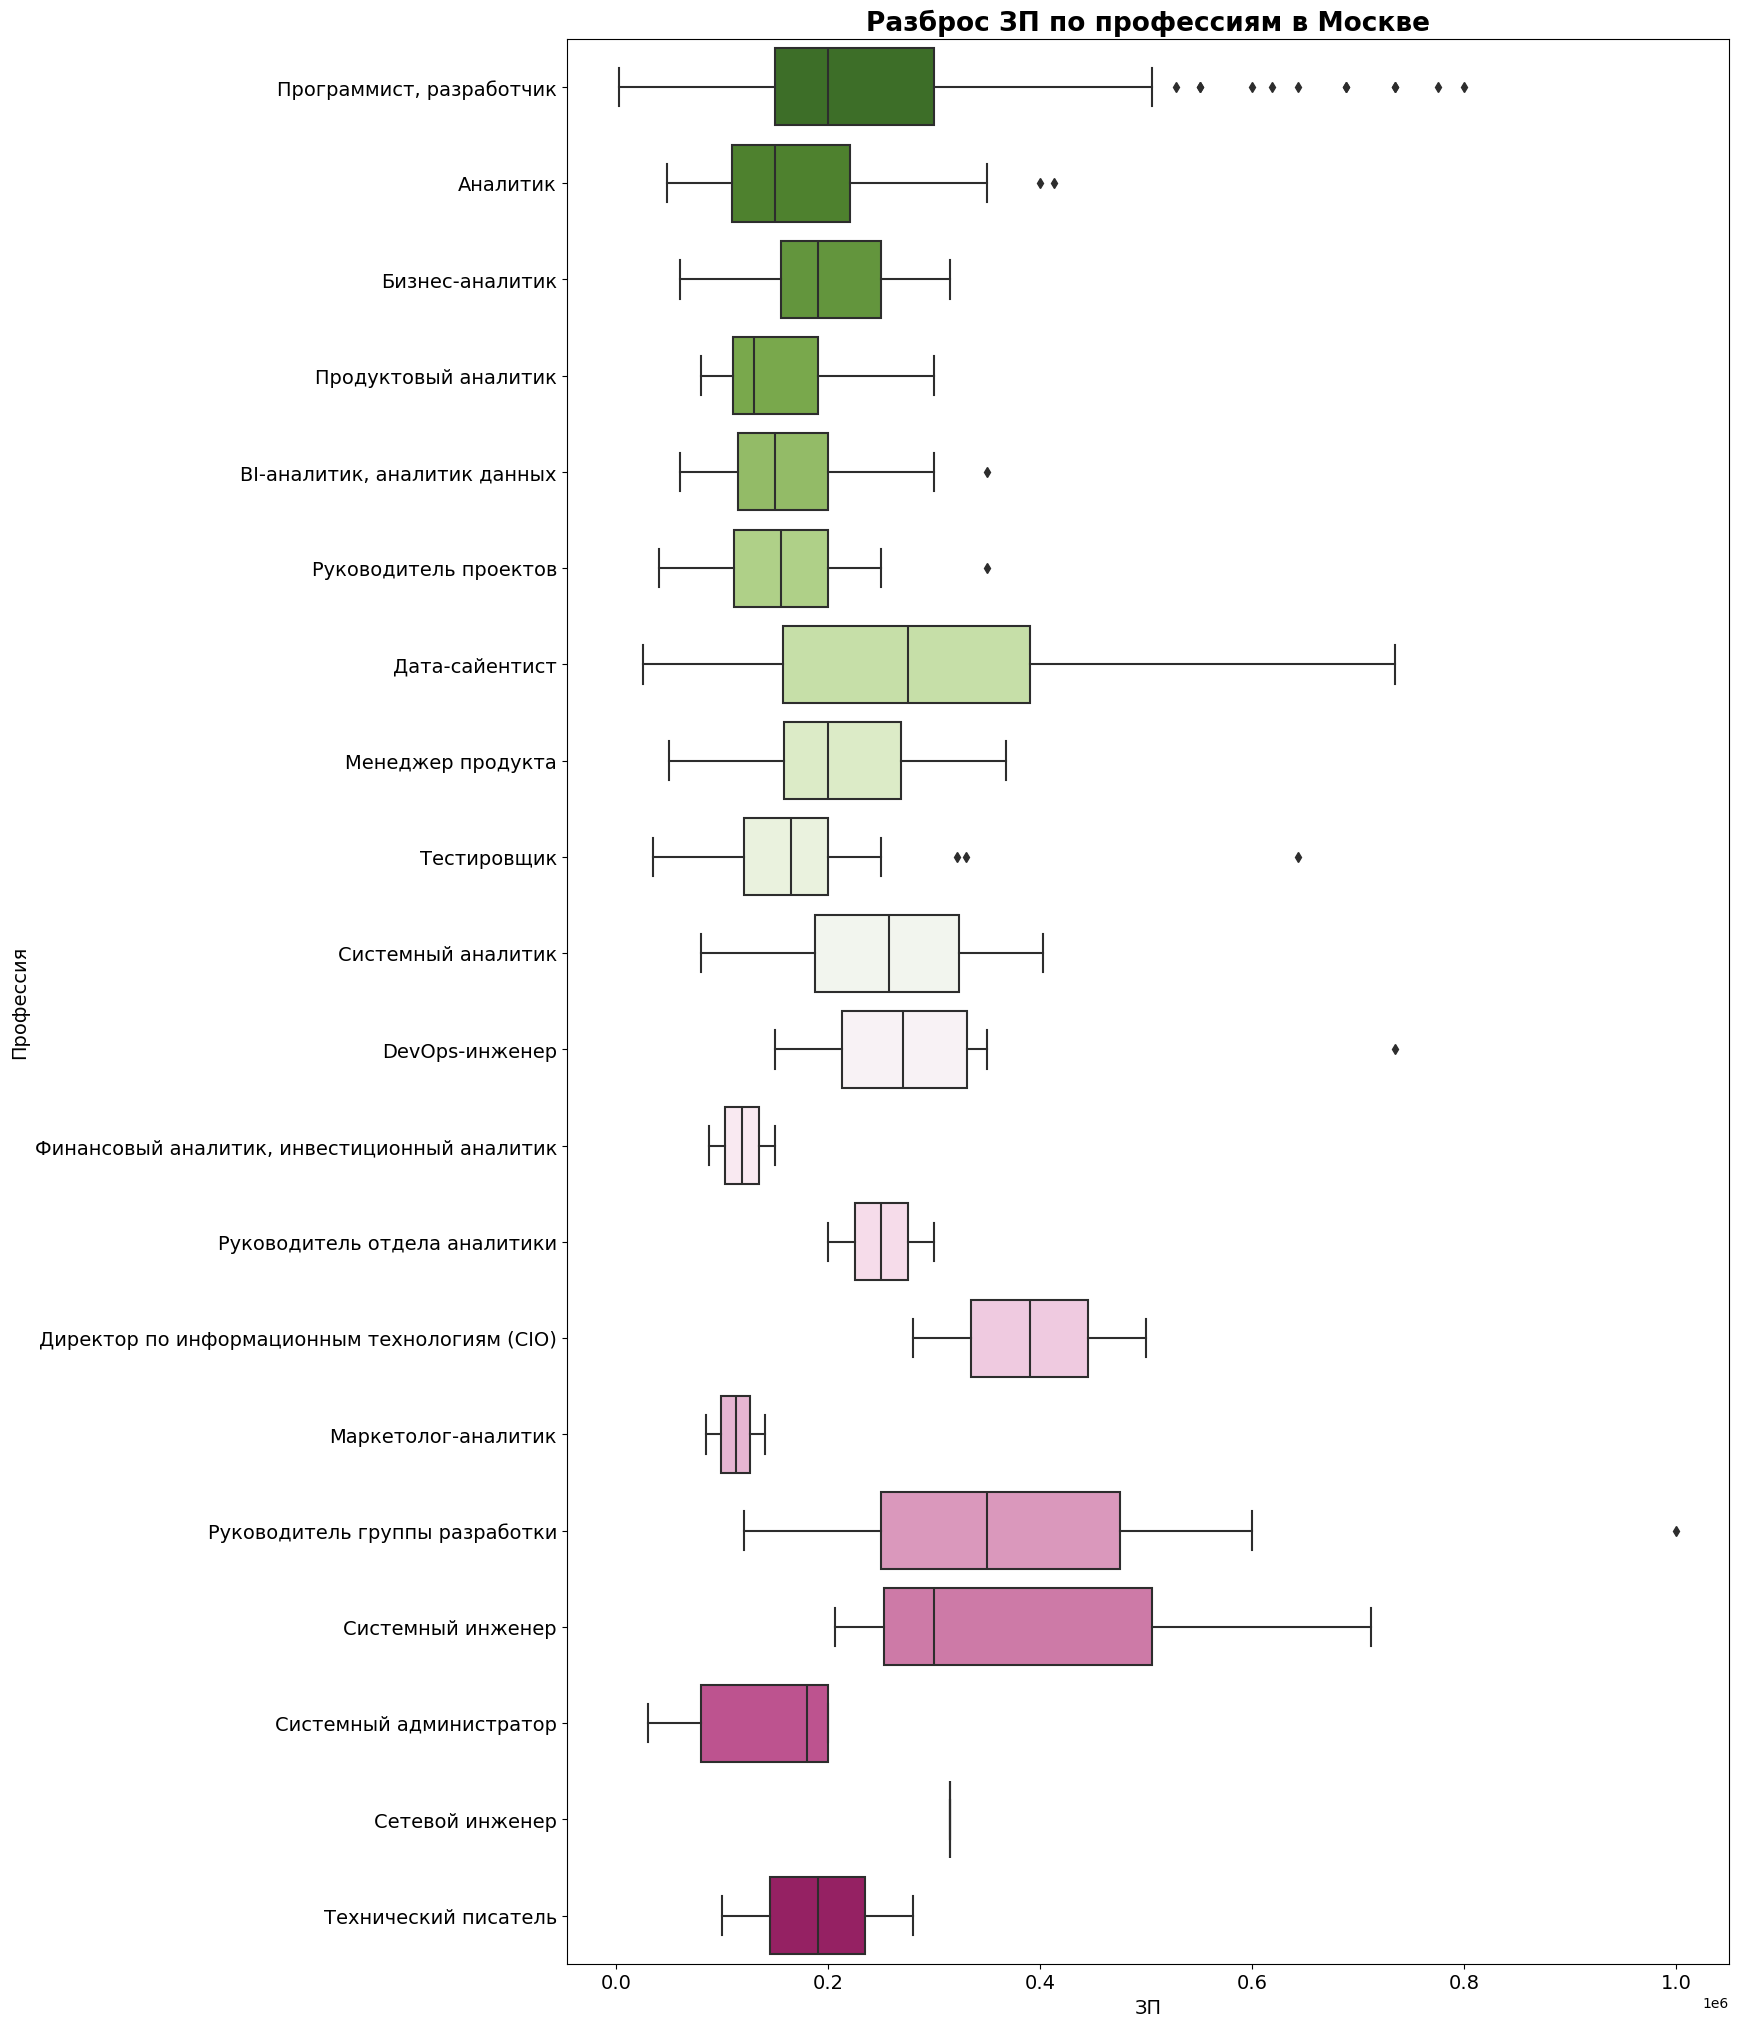

In [71]:
#Теперь посмотрим на этот же график в Москве

df_mosc = df[df['Локация_2'] == 'Москва']

plt.figure(figsize = (15,25))
plt.title('Разброс ЗП по профессиям в Москве', fontsize='19', weight='bold')
sns.boxplot(df_mosc, x='ЗП_сред_RUB', y='Профессия', palette='PiYG_r', orient='h')
plt.yticks(size='14')
plt.xticks(size='14')
plt.ylabel('Профессия', size='14')
plt.xlabel('ЗП', size='14');

In [78]:
# Достанем навыки

g = df['Ключевые навыки'].str.replace('[', '')
skills = g.str.replace(']', '').to_list()
skills_str = ','.join(skills)
skills_str                       # получилась такая странная строчка, надо ее разобрать

In [88]:
# Будем использовать регулряные выражения

import re

pattern = r"'[^']+'"
matches = re.findall(pattern, skills_str)
skills = [re.sub("'", "", match) for match in matches]

In [91]:
# Найдем самые частые скилы

from collections import Counter

counts = Counter(skills)
most_common_20 = counts.most_common(20)
skill = [x[0] for x in most_common_20]
count = [x[1] for x in most_common_20]

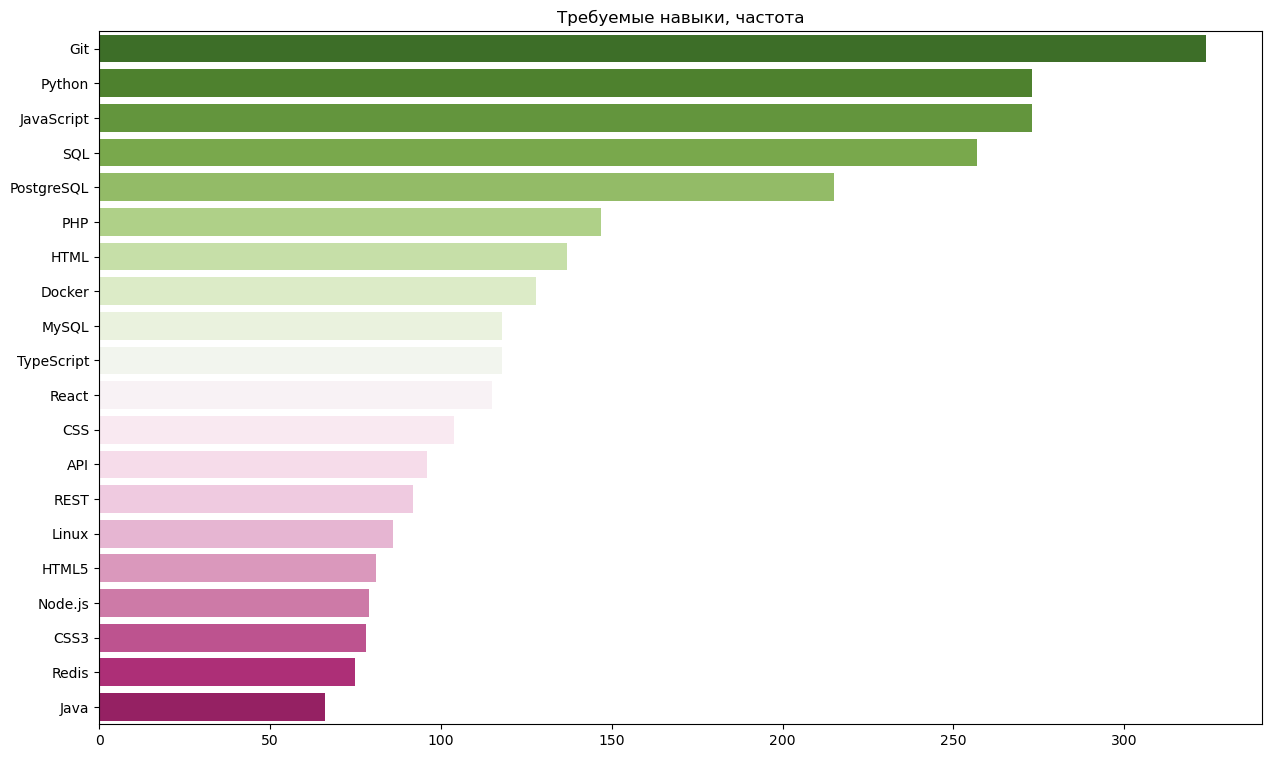

In [93]:
# Построим визуализацию частоты навыков, которые требуют работодатели

plt.figure(figsize = (15,9))
ax = sns.barplot(x=count, y=skill, palette='PiYG_r', orient='h')
ax.set_title('Требуемые навыки, частота');

Теперь давайте сделаем все то же самое, но посмотрим по сферам: чего ждут от аналитиков, а чего от глубоких программистов

In [94]:
df['Профессия'].unique()

array(['Программист, разработчик', 'Аналитик', 'Менеджер продукта',
       'Бизнес-аналитик', 'Продуктовый аналитик',
       'BI-аналитик, аналитик данных', 'Руководитель проектов',
       'Дата-сайентист', 'Тестировщик', 'Системный аналитик',
       'DevOps-инженер', 'Финансовый аналитик, инвестиционный аналитик',
       'Руководитель отдела аналитики',
       'Директор по информационным технологиям (CIO)',
       'Системный администратор', 'Маркетолог-аналитик',
       'Руководитель группы разработки', 'Системный инженер',
       'Сетевой инженер', 'Технический писатель'], dtype=object)

In [101]:
analytics = ['Аналитик', 'Бизнес-аналитик', 'Продуктовый аналитик', 'BI-аналитик, аналитик данных', 'Дата-сайентист', 'Системный аналитик',
             'Финансовый аналитик, инвестиционный аналитик', 'Руководитель отдела аналитики', 'Маркетолог-аналитик', 'Менеджер продукта',
             'Руководитель проектов']

programmers = ['Программист, разработчик', 'Тестировщик', 'DevOps-инженер', 'Директор по информационным технологиям (CIO)',
              'Системный администратор', 'Руководитель группы разработки', 'Системный инженер','Сетевой инженер', 'Технический писатель']

df_anal = df[df['Профессия'].isin(analytics) == True]
df_prog = df[df['Профессия'].isin(programmers) == True]

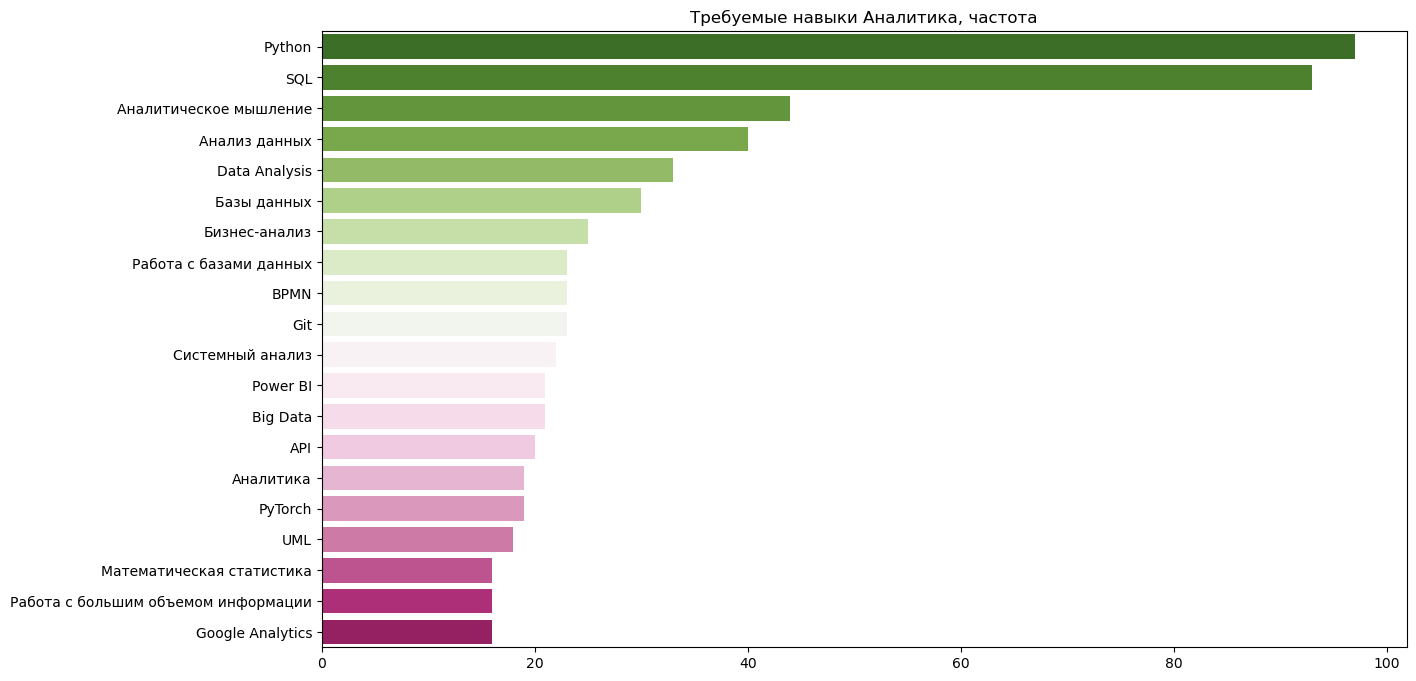

In [102]:
#Аналитики

g = df_anal['Ключевые навыки'].str.replace('[', '')
skills = g.str.replace(']', '').to_list()
skills_str = ','.join(skills)

pattern = r"'[^']+'"
matches = re.findall(pattern, skills_str)
skills = [re.sub("'", "", match) for match in matches]

counts = Counter(skills)
most_common_20 = counts.most_common(20)
skill = [x[0] for x in most_common_20]
count = [x[1] for x in most_common_20]

plt.figure(figsize = (14,8))
ax = sns.barplot(x=count, y=skill, palette='PiYG_r', orient='h')
ax.set_title('Требуемые навыки Аналитика, частота');

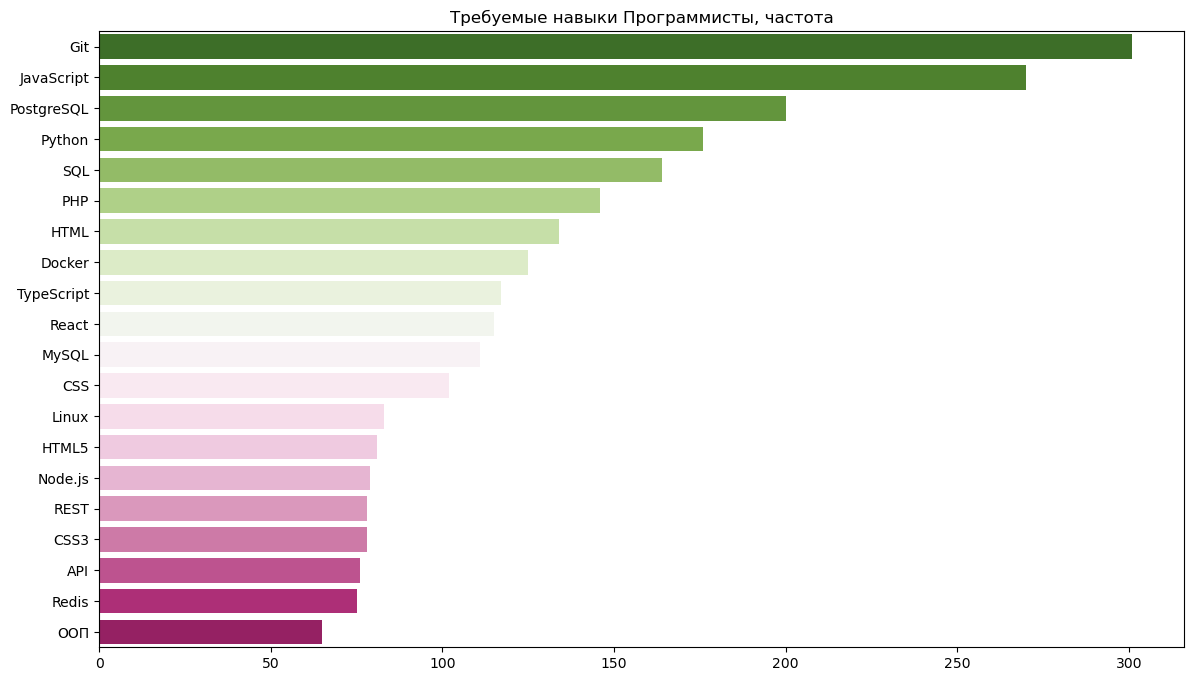

In [103]:
#Прогеры

g = df_prog['Ключевые навыки'].str.replace('[', '')
skills = g.str.replace(']', '').to_list()
skills_str = ','.join(skills)

pattern = r"'[^']+'"
matches = re.findall(pattern, skills_str)
skills = [re.sub("'", "", match) for match in matches]

counts = Counter(skills)
most_common_20 = counts.most_common(20)
skill = [x[0] for x in most_common_20]
count = [x[1] for x in most_common_20]

plt.figure(figsize = (14,8))
ax = sns.barplot(x=count, y=skill, palette='PiYG_r', orient='h')
ax.set_title('Требуемые навыки Программисты, частота');

Давайте сделаем новый признак, который будет разделять наши вакансии на направления Аналитика и Прога. Let's goooo

In [106]:
def field(raw):
    if raw['Профессия'] in analytics:
        f = 'Аналитика'
    else:
        f = 'Прога'
    return f

df['Сфера'] = df.apply(field, axis=1)    

In [108]:
# Давайте сначала глянем, что у нас там по соотношению вакансий
# Прогеры жоско лидируют. Ну ничего

df['Сфера'].value_counts() 

Сфера
Прога        1001
Аналитика     263
Name: count, dtype: int64

Теперь давайте посмотрим на разницу в ЗП у прогеров и аналитиков по городам

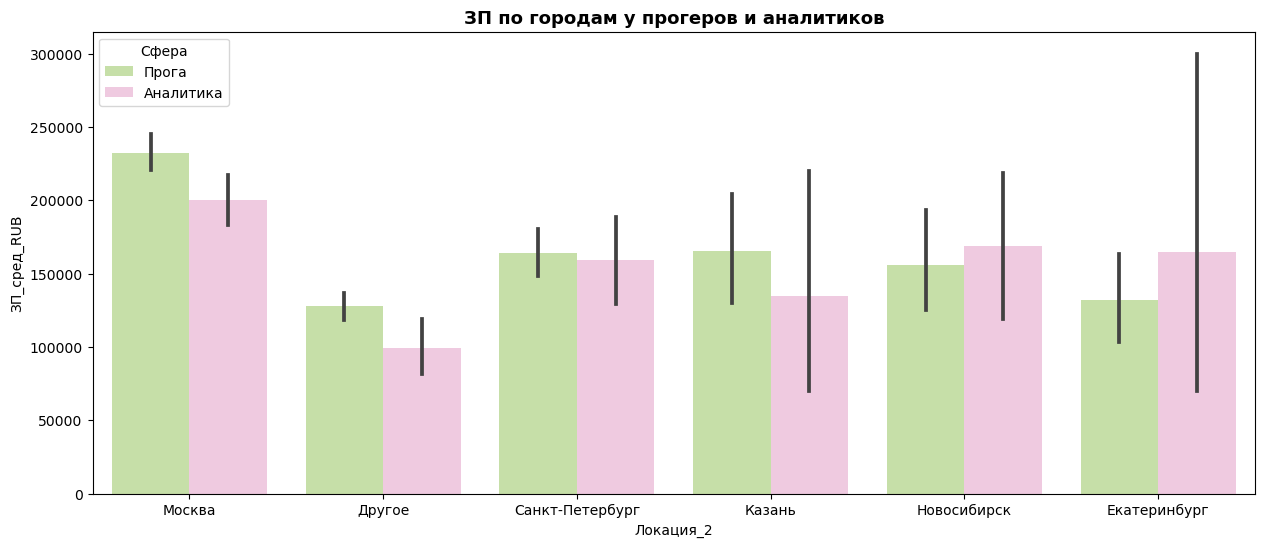

In [116]:
#О нет, походу прогеры зарабатывают больше аналитиков. Ну что поделать(((

plt.figure(figsize = (15,6))
plt.title('ЗП по городам у прогеров и аналитиков', fontsize='13', weight='bold')
sns.barplot(data=df, x ='Локация_2', y='ЗП_сред_RUB', hue='Сфера', palette='PiYG_r');

Посмотрим, как опыт работы влияет на ЗП

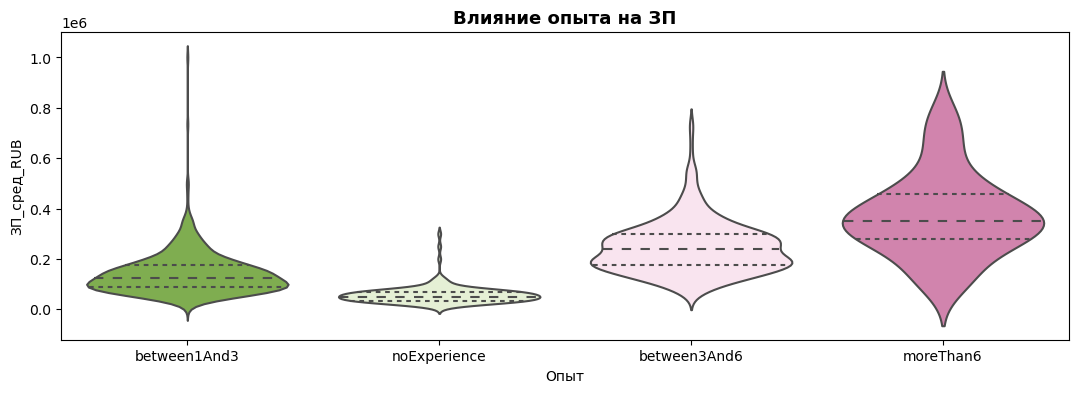

In [117]:
# В принципе результат довольно закономерный

plt.figure(figsize = (13,4))
plt.title('Влияние опыта на ЗП', fontsize='13', weight='bold')
plt.ylabel('ЗП')
sns.violinplot(df, x='Опыт', y='ЗП_сред_RUB', scale='width', split=True, palette='PiYG_r', inner="quart");

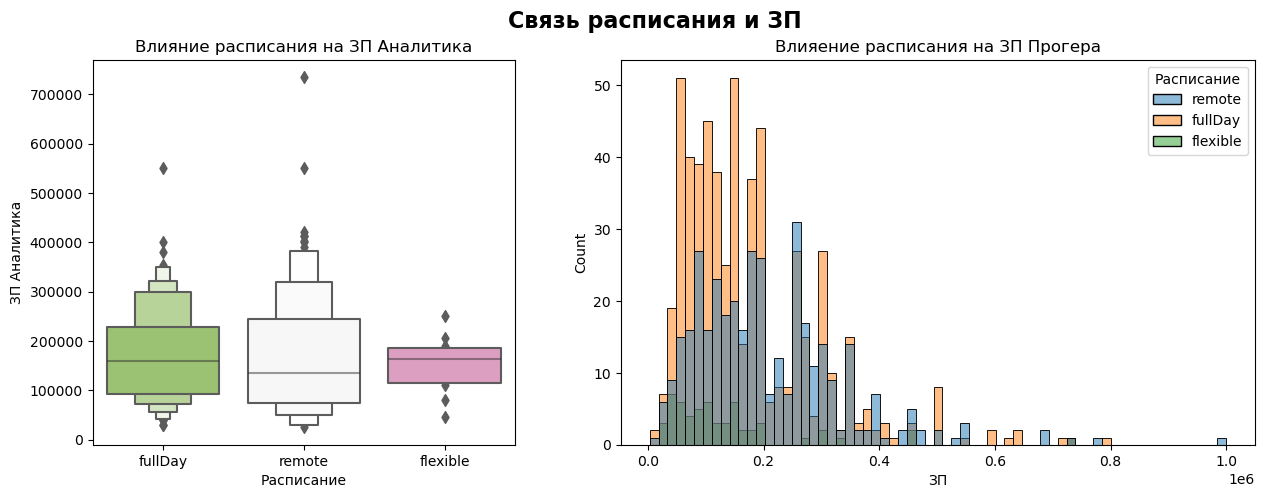

In [128]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [2,3]})
fig.suptitle('Связь расписания и ЗП', weight='bold', fontsize=16)


sns.boxenplot(ax=ax1, data=df_anal, x='Расписание', 
              y='ЗП_сред_RUB', palette='PiYG_r')
ax1.set_ylabel('ЗП Аналитика')
ax1.set_title('Влияние расписания на ЗП Аналитика')


sns.histplot(data=df_prog, x='ЗП_сред_RUB', ax=ax2, 
             hue='Расписание', bins=65)
ax2.set_xlabel('ЗП')
ax2.set_title('Влияение расписания на ЗП Прогера');

In [137]:
#Давайте теперь закодируем часть признаков и посмотрим корреляции

In [147]:
cat = ['Тип_занятости', 'Локация_2', 'Расписание', 'Опыт']
signs = ['Тип_занятости', 'Локация_2', 'Расписание', 'Опыт', 'ЗП_сред_RUB']
df_numeric = pd.get_dummies(df[signs], columns=cat)
df_numeric.head()

,ЗП_сред_RUB,Тип_занятости_FULL_TIME,Тип_занятости_INTERN,Тип_занятости_PART_TIME,Тип_занятости_TEMPORARY,Локация_2_Другое,Локация_2_Екатеринбург,Локация_2_Казань,Локация_2_Москва,Локация_2_Новосибирск,Локация_2_Санкт-Петербург,Расписание_flexible,Расписание_fullDay,Расписание_remote,Опыт_between1And3,Опыт_between3And6,Опыт_moreThan6,Опыт_noExperience
1,125000.0,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False
3,150000.0,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False
4,105000.0,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False
5,130000.0,True,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False
6,75000.0,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True


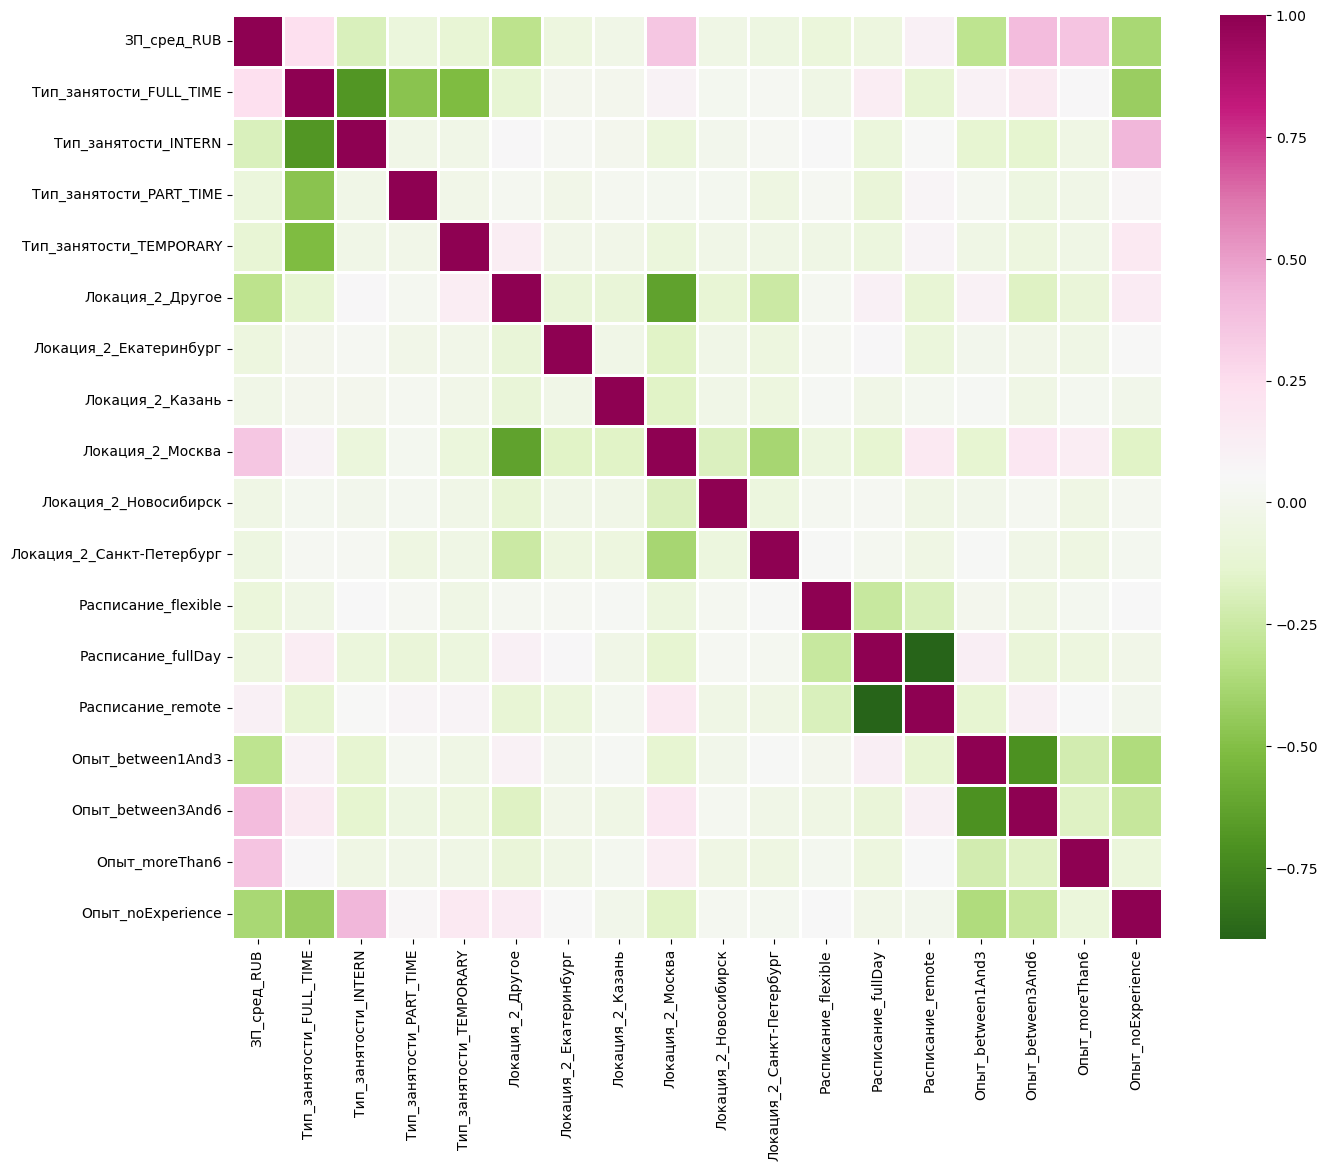

In [158]:
plt.figure(figsize = (15,12))

colormap = plt.cm.PiYG_r
ax = sns.heatmap(df_numeric.corr(), cmap=colormap, linewidths=1, fmt="0.2f")

for t in ax.texts:
    if abs(float(t.get_text())) >= 0.5:
        t.set_text(t.get_text())
    else:
        t.set_text('')

Из полезные корреляций: отсутствие опыта - отрицательная корреляция с ЗП, опыт больше 6 лет - положительная корреляция с ЗП, Локация_2_Москва - положителбная корреляция с ЗП, Локация_2_Другое - отрицательная корреляция с ЗП, Тип_занятости_FULL_TIME - легкая положительная корреляция с ЗП, Тип_занятости_INTERN - легкая отрицательная корреляция с ЗП.

Из логичных корреляций: Отсутствие опыт положительно коррелирует с типом занятости INTERN и отрицательно с типом занятости FULL_TIME

# Поработаем с текстом, to be continued

In [136]:
import nltk
from nltk import tokenize
from nltk.tokenize import word_tokenize
nltk.download("punkt", quiet=True)
nltk.download("stopwords", quiet=True)

True

In [133]:
df.head()

,Организация,Описание,Тип_занятости,Локация,Ключевые навыки,Вакансия,ЗП_от,ЗП_до,Валюта,Профессия_id,Требования,Обязанности,Расписание,Опыт,Профессия,ЗП_сред,ЗП_сред_RUB,Локация_2,Сфера
1,Инновационная Экологическая Платформа,Ecoplatform - один из лидеров рынка фандоматов...,FULL_TIME,Москва,['React'],Frontend developer (React),100000.0,150000.0,RUR,96,Опыт разработки мобильных приложений на React ...,Разработка простых интеграций для программы ло...,remote,between1And3,"Программист, разработчик",125000.0,125000.0,Москва,Прога
3,НИТУ МИСИС,Университет науки и технологий МИСИС является ...,FULL_TIME,Москва,[],Data Scientist,150000.0,NaN,RUR,96,Высшее образование. Качественный опыт работы в...,Участие в проектировании и реализации решений ...,fullDay,between1And3,"Программист, разработчик",150000.0,150000.0,Москва,Прога
4,ООО «Вин-Маркет»,Кто мы: Aftermarket-DATA © — разработчик прогр...,FULL_TIME,Нижний Новгород,"['PHP', 'Git', 'MySQL', 'Redis', 'REST', 'SOAP...",Python-программист (Backend),90000.0,120000.0,RUR,96,"Python. PHP. HTML, CSS. JavaScript, jQuery. GI...",Участвовать во всех этапах проекта: от проекти...,fullDay,between1And3,"Программист, разработчик",105000.0,105000.0,Другое,Прога
5,Data-Power,Требуемый опыт работы: 3–6 лет Полная занятост...,FULL_TIME,Санкт-Петербург,"['DAX', 'PostgreSQL', 'SQL', 'Power BI', 'Powe...",Разработчик Power BI,100000.0,160000.0,RUR,96,...в <highlighttext>аналитике</highlighttext>:...,Разработка и внедрение <highlighttext>аналитик...,fullDay,between1And3,"Программист, разработчик",130000.0,130000.0,Санкт-Петербург,Прога
6,RTNO,"Привет! Мы компания RTNO, занимаемся аналитико...",FULL_TIME,Москва,"['Python', 'Сбор и анализ информации', 'Анализ...",Аналитик крипто проектов,75000.0,NaN,RUR,10,Поддержание актуальных знаний о развитии рынка...,Ежедневный анализ децентрализованных и централ...,fullDay,noExperience,Аналитик,75000.0,75000.0,Москва,Аналитика


In [134]:
df_text = df[['Описание', 'Требования', 'Обязанности']]
df_text.head()

,Описание,Требования,Обязанности
1,Ecoplatform - один из лидеров рынка фандоматов...,Опыт разработки мобильных приложений на React ...,Разработка простых интеграций для программы ло...
3,Университет науки и технологий МИСИС является ...,Высшее образование. Качественный опыт работы в...,Участие в проектировании и реализации решений ...
4,Кто мы: Aftermarket-DATA © — разработчик прогр...,"Python. PHP. HTML, CSS. JavaScript, jQuery. GI...",Участвовать во всех этапах проекта: от проекти...
5,Требуемый опыт работы: 3–6 лет Полная занятост...,...в <highlighttext>аналитике</highlighttext>:...,Разработка и внедрение <highlighttext>аналитик...
6,"Привет! Мы компания RTNO, занимаемся аналитико...",Поддержание актуальных знаний о развитии рынка...,Ежедневный анализ децентрализованных и централ...
